<a href="https://colab.research.google.com/github/hajonghyun/installPytorch_study/blob/main/4_torch_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Binary Classification

## STEP 1. 데이터 모으기

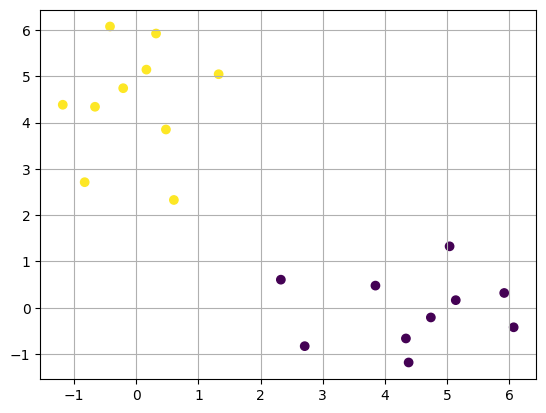

In [ ]:
# case 1
N=20
random0=torch.randn(int(N/2),1)
random5=torch.randn(int(N/2),1)+5
class1_data=torch.hstack([random0,random5])  # 0,5 근처 값들?
class2_data=torch.hstack([random5,random0])  # 5,0 근처 값들?
class1_label=torch.ones(int(N/2),1)
class2_label=torch.zeros(int(N/2),1)
x=torch.vstack([class1_data,class2_data])
y=torch.vstack([class1_label,class2_label])


plt.figure()
plt.scatter(x[:,0],x[:,1],c=y)
plt.grid()

## STEP 2. 모델 만들기

In [ ]:
from torch import nn

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()

        # case1, plain
        self.linear1=nn.Sequential(nn.Linear(2,100), # 10, 100, 1000으로 바꿔보면서 확인
                                   nn.Sigmoid(),
                                   nn.Linear(100,1), # node가 많을수록 좋게 나옴
                                   nn.Sigmoid())
    def forward(self,x):
        x=self.linear1(x)
        return x





In [ ]:
# 랜덤값으로 출력값 체크 (학습 전)
example=torch.randn(5,2)
model=MLP()
print(model)
print(model(example))

MLP(
  (linear1): Sequential(
    (0): Linear(in_features=2, out_features=100, bias=True)
    (1): Sigmoid()
    (2): Linear(in_features=100, out_features=1, bias=True)
    (3): Sigmoid()
  )
)
tensor([[0.5226],
        [0.5237],
        [0.5245],
        [0.5554],
        [0.5313]], grad_fn=<SigmoidBackward0>)


## STEP 3. 모델 학습시키기

In [ ]:
from torch import optim
!pip install torchviz
from torchviz import make_dot

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 56.5 MB/s eta 0:00:00
  Attempting uninstall: sympy
    Found existing installation: sympy 1.11.1
    Uninstalling sympy-1.11.1:
      Successfully uninstalled sympy-1.11.1


In [ ]:
LR=1e-1    # case1
# LR=1e-2  # case2, plain에서 노드 1000개, deep
# LP=1e-4  # case2, very deep relu

EPOCH=100
# EPOCH=500


optimizer=optim.SGD(model.parameters(),lr=LR)
# optimizer=optim.Adam(model.parameters(),lr=LR)

criterion=nn.BCELoss() # Binary Cross Entropy

loss_history=[]
# grad_history=[]
# update_size_history=[]

model.train()
for ep in range(EPOCH):
    # 예측 -> loss -> 미분 -> 업데이트 flow
    y_hat=model(x) # 1. Inference 로 예측하고
    loss=criterion(y_hat,y) # 2. Loss 구해서
    optimizer.zero_grad()
    loss.backward() # 3. BackPropagation 미분하고
    optimizer.step() # 4. Weight Update 업데이트한다.
    loss_history.append(loss.item())
    print(f"Epoch: {ep+1}, train loss: {loss.item():.4f}")
    print("=====================")

Epoch: 1, train loss: 0.0112
Epoch: 2, train loss: 0.0111
Epoch: 3, train loss: 0.0111
Epoch: 4, train loss: 0.0110
Epoch: 5, train loss: 0.0110
Epoch: 6, train loss: 0.0110
Epoch: 7, train loss: 0.0109
Epoch: 8, train loss: 0.0109
Epoch: 9, train loss: 0.0109
Epoch: 10, train loss: 0.0108
Epoch: 11, train loss: 0.0108
Epoch: 12, train loss: 0.0108
Epoch: 13, train loss: 0.0107
Epoch: 14, train loss: 0.0107
Epoch: 15, train loss: 0.0107
Epoch: 16, train loss: 0.0106
Epoch: 17, train loss: 0.0106
Epoch: 18, train loss: 0.0106
Epoch: 19, train loss: 0.0106
Epoch: 20, train loss: 0.0105
Epoch: 21, train loss: 0.0105
Epoch: 22, train loss: 0.0105
Epoch: 23, train loss: 0.0104
Epoch: 24, train loss: 0.0104
Epoch: 25, train loss: 0.0104
Epoch: 26, train loss: 0.0103
Epoch: 27, train loss: 0.0103
Epoch: 28, train loss: 0.0103
Epoch: 29, train loss: 0.0103
Epoch: 30, train loss: 0.0102
Epoch: 31, train loss: 0.0102
Epoch: 32, train loss: 0.0102
Epoch: 33, train loss: 0.0101
Epoch: 34, train lo

In [ ]:
# Binary Cross Entropy 수식으로 확인해보기
print(criterion(y_hat,y))
print(torch.sum(-torch.log(y_hat**y * (1-y_hat)**(1-y)))/N)

# 무한대로 발산은 100이 최대다. (clamping)
print(criterion(torch.tensor([0.]), torch.tensor([1.])))

tensor(0.0085, grad_fn=<BinaryCrossEntropyBackward0>)
tensor(0.0085, grad_fn=<DivBackward0>)
tensor(100.)


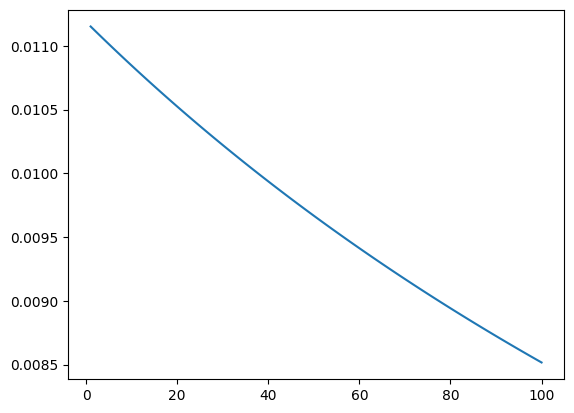

In [ ]:
plt.plot(range(1,EPOCH+1),loss_history) #????